# ¿Que más se podría hacer?

- Test con data augmentation y la LSTM
- Usar los tokenizadores usados en los transformers para ver como funcionan
- TSNE de embeddings y analizar si hay interpretación
- Probar con otras encimas o proteinas
- Usar los embeddings entrenados para analizar resultados de proteinas o encimas con menos data
- Entrenar una red neuronal con los features (fingerprints por ejemplo) y comparar los resultados con los embeddings


# Tome cualquiera de estas propuestas o alguna suya y desarrolle

In [1]:
# LSTM con data augmentation

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [3]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


In [4]:
X = df['canonical_smiles'].values
y = df['pIC50'].values

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:

tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [8]:
# data augmentation

from dataaug import SmilesEnumerator
sme = SmilesEnumerator()
for i in range(10):
    print(sme.randomize_smiles('CSc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1'))
    print(sme.randomize_smiles('O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F'))

n1c(SC)oc(=O)n1-c1cc(OCc2ccccc2)ccc1
C(n1c(SCC(F)(F)F)nc(-c2ccc(Cl)cc2)n1)(=O)N1CCCCC1
c1ccccc1COc1cc(-n2c(=O)oc(SC)n2)ccc1
c1cc(Cl)ccc1-c1nc(SCC(F)(F)F)n(C(=O)N2CCCCC2)n1
c1cc(COc2cc(-n3nc(SC)oc3=O)ccc2)ccc1
C(C(F)(F)F)Sc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCCCC1
c1ccc(COc2cccc(-n3nc(SC)oc3=O)c2)cc1
S(CC(F)(F)F)c1nc(-c2ccc(Cl)cc2)nn1C(N1CCCCC1)=O
c1ccccc1COc1cccc(-n2nc(SC)oc2=O)c1
C1CCCCN1C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
c1ccc(COc2cccc(-n3nc(SC)oc3=O)c2)cc1
n1n(C(=O)N2CCCCC2)c(SCC(F)(F)F)nc1-c1ccc(Cl)cc1
c1c(COc2cc(-n3nc(SC)oc3=O)ccc2)cccc1
C1CCN(C(=O)n2c(SCC(F)(F)F)nc(-c3ccc(Cl)cc3)n2)CC1
c1c(-n2nc(SC)oc2=O)cccc1OCc1ccccc1
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
c1(COc2cc(-n3nc(SC)oc3=O)ccc2)ccccc1
C1CCCN(C(=O)n2c(SCC(F)(F)F)nc(-c3ccc(Cl)cc3)n2)C1
S(C)c1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
C1CCN(C(=O)n2nc(-c3ccc(Cl)cc3)nc2SCC(F)(F)F)CC1


In [9]:

from datagen import smiles_dict, smiles_to_seq


In [10]:
from datagen import DataGenerator

In [11]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

max_sequence_len = len(df['canonical_smiles'].iloc[max_len_idx]) + 20

In [12]:
max_sequence_len

227

In [13]:
dgen = DataGenerator(X, y, max_sequence_len, batch_size=16)

In [14]:
len(dgen) * dgen.batch_size

5104

In [15]:
for i, (X_b, y_b) in enumerate(dgen):
    print(f'{i}\r', end='')

In [16]:
len(dgen)

319

In [17]:
dgen[318]

(array([[21,  2, 16, ...,  0,  0,  0],
        [16,  7, 16, ...,  0,  0,  0],
        [28,  7,  2, ...,  0,  0,  0],
        ...,
        [28,  7,  8, ...,  0,  0,  0],
        [28,  7, 28, ...,  0,  0,  0],
        [28,  7, 28, ...,  0,  0,  0]]),
 array([6.57057074, 5.30103   , 6.56863624, 4.87999991, 7.        ,
        3.74472749, 5.        , 6.06550155, 6.40011693, 5.32975415,
        7.13076828, 4.69897   , 4.        , 4.90354189, 7.7212464 ]))

In [18]:
X

array(['CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1',
       'O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1',
       'CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1', ...,
       'COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1',
       'COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1ccc(F)cc1',
       'O=C1CCCC2=C1C(c1ccc(OCc3cccc(F)c3)c(Br)c1)C1=C(CCCC1=O)N2'],
      dtype=object)

In [19]:
X.shape

(5103,)

In [20]:
X_b.shape

(15, 227)

In [21]:
y_b.shape

(15,)

In [22]:
#split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_test)

(4082, 4082, 1021)

In [23]:
X_train

array(['COc1ccccc1C(=O)Nc1ccc2c(c1)CN(C(=O)c1cccc(Cl)c1)C(=O)C2',
       'c1ccc2oc(CNCCCCCCCNc3c4c(nc5ccccc35)CCCC4)cc2c1',
       'C=C1c2cc(Cl)ccc2N=C2CCCCCN12', ...,
       'O=C(Cc1cc(=O)oc2cc(O)ccc12)N/N=C1\\SCC(=O)N1c1c2c(nc3ccccc13)CCCC2',
       'O=C(NCCCCCc1ccccc1)Oc1ccc(-n2cc(COc3ccc4ccc(=O)oc4c3)nn2)cc1',
       'CN(C)Cc1ccc(CSCCCCCCCCSCc2ccc(CN(C)C)o2)o1'], dtype=object)

In [24]:
dgen_train = DataGenerator(X_train, y_train, seq_length=max_sequence_len, batch_size=128, data_augmentation=True)
dgen_test = DataGenerator(X_test, y_test, seq_length=max_sequence_len, batch_size=128, data_augmentation=False)

In [25]:
dgen_train[0]

(array([[16,  2, 21, ...,  0,  0,  0],
        [28,  7,  8, ...,  0,  0,  0],
        [28,  7,  2, ...,  0,  0,  0],
        ...,
        [16,  2, 20, ...,  0,  0,  0],
        [16,  7, 16, ...,  0,  0,  0],
        [16,  7, 16, ...,  0,  0,  0]]),
 array([ 5.88999985, 14.30103   ,  7.04575749,  5.45593196,  4.70245833,
         3.        ,  4.53047252,  3.95900231,  9.13667714,  5.16241156,
         7.09691001,  6.80134291,  6.70996539,  8.48148606,  5.88999985,
         4.63563665,  7.65757732,  6.76955108,  7.77469072,  6.4202164 ,
         5.        ,  7.48945499,  5.22184875,  4.96137984,  5.37675071,
         4.08884239,  7.2915791 ,  5.52287875,  4.        ,  5.19654288,
         4.28999999,  3.11350927,  5.87942607,  5.04575749,  2.627088  ,
         5.16001944,  4.30627305,  4.88605665,  6.42481216,  2.8068754 ,
         5.        ,  5.30103   ,  6.56863624,  3.        ,  3.35654732,
         4.82623118,  4.25963731,  5.23657201,  5.52287875,  5.00966115,
         5.52287875, 

In [26]:
len(dgen_train)

32

In [27]:
len(dgen_test)

8

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [29]:
# Métrica

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [30]:
vocab_size = 38 # valor del len del tokenizer en la LSTM previa
vocab_size

38

In [31]:
model = Sequential()

# Implementar modelo completo

model.add(Embedding(input_dim = vocab_size + 1, output_dim= 64, input_length=max_sequence_len))
model.add(Bidirectional(LSTM(50, return_sequences=False, activation='tanh')))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 227, 64)           2496      
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               46000     
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 53,797
Trainable params: 53,697
Non-trainable params: 100
__________________________________________________

In [33]:
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='mse', metrics=[R2])

In [34]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [35]:
history = model.fit(dgen_train, epochs=100, batch_size=128, validation_data=dgen_test, callbacks=[])

Epoch 1/100
32/32 [==============================] - 10s 130ms/step - loss: 25.5503 - R2: -8.7214 - val_loss: 34.5625 - val_R2: -11.3336
Epoch 2/100
32/32 [==============================] - 3s 93ms/step - loss: 17.9678 - R2: -5.9143 - val_loss: 31.7588 - val_R2: -11.0758
Epoch 3/100
32/32 [==============================] - 3s 93ms/step - loss: 14.9933 - R2: -4.6626 - val_loss: 28.9170 - val_R2: -9.8555
Epoch 4/100
32/32 [==============================] - 3s 94ms/step - loss: 12.2502 - R2: -3.5767 - val_loss: 25.5943 - val_R2: -8.4353
Epoch 5/100
32/32 [==============================] - 3s 92ms/step - loss: 9.8847 - R2: -2.6586 - val_loss: 21.3315 - val_R2: -6.7732
Epoch 6/100
32/32 [==============================] - 3s 95ms/step - loss: 7.5476 - R2: -1.8135 - val_loss: 15.7322 - val_R2: -4.7570
Epoch 7/100
32/32 [==============================] - 3s 95ms/step - loss: 5.7365 - R2: -1.1575 - val_loss: 9.3382 - val_R2: -2.4158
Epoch 8/100
32/32 [==============================] - 3s 95ms/s

In [36]:
X_test_eval = []
y_t_eval = []
for X_t, y_t in dgen_test:
    X_test_eval = X_test_eval + [list(t) for t in X_t]
    y_t_eval = y_t_eval + list(y_t)
X_test_eval = np.array(X_test_eval)
y_test = np.array(y_t_eval)

In [37]:
X_test_eval.shape, y_test.shape

((1021, 227), (1021,))

In [38]:
y_pred = model.predict(X_test_eval)

In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [40]:
r2

0.15335519495010097

In [41]:
model.save('models/embed_64_bi_lstm_100_augmented.h5', )

<function matplotlib.pyplot.show(close=None, block=None)>

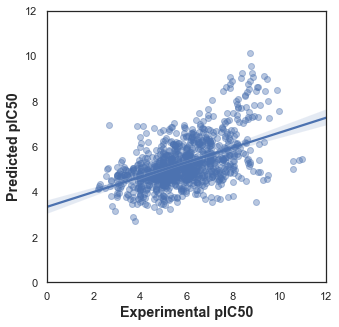

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show